### Generando el dataset

In [ ]:
!pip install spotipy --upgrade

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import util
import pandas as pd

In [ ]:
def get_track_features(track_ids, spotify):

    features_df = pd.DataFrame(columns=['name', 'album', 'artist', 'release_date', 'popularity', 'id', 
                                        'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo'])

    for track_id in track_ids:

      meta = spotify.track(track_id)
      features = spotify.audio_features(track_id)

      # meta
      name = meta['name']
      album = meta['album']['name']
      artist = meta['album']['artists'][0]['name']
      release_date = meta['album']['release_date']
      popularity = meta['popularity']
      id =  meta['id']

      # features
      acousticness = features[0]['acousticness']
      danceability = features[0]['danceability']
      duration_ms = features[0]['duration_ms']
      energy = features[0]['energy']
      instrumentalness = features[0]['instrumentalness']
      liveness = features[0]['liveness']
      valence = features[0]['valence']
      loudness = features[0]['loudness']
      speechiness = features[0]['speechiness']
      tempo = features[0]['tempo']

      features_df.loc[len(features_df.index)] = [name, album, artist, release_date, popularity, id, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, valence, loudness, speechiness, tempo]
    
    return features_df

In [ ]:
spotify = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          username='deyvisml', 
          scope='user-library-read',
          client_id='6d0f9aaa34434405ab4e8ccf13c5e8a4',
          client_secret='18852cb5021a446dbec8452846a1b42a',
          redirect_uri='http://.google.com',
          open_browser=False))

In [ ]:
playlists = {
             'Energetic' : ["https://open.spotify.com/playlist/4QDWboU5rwpDRXwYprwJf5?si=815ef93592e7475f",
                            "https://open.spotify.com/playlist/0V32mTwWBzo6rNIk21owsY?si=1421ae7c97434fbf",
                            "https://open.spotify.com/playlist/37i9dQZF1DWZVAVMhIe3pV?si=e938fbab06704fa3",
                            "https://open.spotify.com/playlist/0aiTiI5o1lY26AFdf6V4vd?si=f5d08192f46a4247",
                            "https://open.spotify.com/playlist/7HptHES38lgW9wW4jZpBLL?si=4f904f3e5f504cd6",
                            "https://open.spotify.com/playlist/0f3jgTdNaT7UVx8kMpMOnt?si=0a8fbf05817149b4",
                            "https://open.spotify.com/playlist/37i9dQZF1DWYp5sAHdz27Y?si=2691e47426f24bb1"],
             'Happy' :     ["https://open.spotify.com/playlist/1h90L3LP8kAJ7KGjCV2Xfd?si=5e2691af69e544a3",
                            "https://open.spotify.com/playlist/4AnAUkQNrLKlJCInZGSXRO?si=9846e647548d4026",
                            "https://open.spotify.com/playlist/3ck7KjH34H20a48Ew37roz?si=de3adbf848b74ba8",
                            "https://open.spotify.com/playlist/1l1TFIC0tf0OLDqTO8BcGP?si=f9f4af7621034266",
                            "https://open.spotify.com/playlist/1l1TFIC0tf0OLDqTO8BcGP?si=0354b6000ceb4f0a",
                            "https://open.spotify.com/playlist/3ck7KjH34H20a48Ew37roz?si=365babca6ffe458b",
                            "https://open.spotify.com/playlist/4AnAUkQNrLKlJCInZGSXRO?si=3ea55d9aaa924824",
                            "https://open.spotify.com/playlist/6pTTaGg2WTR1fJYpdwHo4K?si=3760bcdfe9934574",
                            "https://open.spotify.com/playlist/2oMvaOzAykhVFXEUL1BgIC?si=5f69f6731ef3442d",
                            "https://open.spotify.com/playlist/4El1R3KDhjN4KbDoZD3Zyg?si=26f72ff41cc14aaa"],
             'Sad':        ["https://open.spotify.com/playlist/1n2MYYpuxk9ueZD2iGYJXB?si=34c51a703dd04640",
                            "https://open.spotify.com/playlist/3c0Nv5CY6TIaRszlTZbUFk?si=8b2618e9857340b6",
                            "https://open.spotify.com/playlist/44tRfteJJzAmUONSiA56bQ?si=7a2d5e8f75fd410c",
                            "https://open.spotify.com/playlist/3ki8vUdZYRPTbWbjvmEZpj?si=8765fcb260be494f",
                            "https://open.spotify.com/playlist/3ki8vUdZYRPTbWbjvmEZpj?si=530b142e2398447d",
                            "https://open.spotify.com/playlist/5NrGEthiUdx4TWBHjBxi8p?si=5358f7d41b8d470e",
                            "https://open.spotify.com/playlist/48pKsvTVUtFmkQKfbQefPy?si=60ceb099074b427f",
                            "https://open.spotify.com/playlist/3sMglvMJXhjWbFoDWwRV0U?si=15bf1be3a23e4c55",
                            "https://open.spotify.com/playlist/1qHC5kr5N0czuvIQG01vD9?si=8be58081286f4177",
                            "https://open.spotify.com/playlist/5mZdg8m9fRA16ZAUrMkqez?si=39b0c709f61b49af",
                            "https://open.spotify.com/playlist/6KJzsY7bEBMgeYyFgVjnpk?si=644318ea517d4270",
                            "https://open.spotify.com/playlist/37i9dQZF1DWT0qByOJYmmJ?si=ddf94f398d3a4f59"]
}

In [ ]:
tracks = pd.DataFrame()

In [ ]:
tracks

In [ ]:
for mood, links in playlists.items():
    print (mood)
    for link in links:
        id = link[34:56]

        try:
            pl_tracks = spotify.playlist_tracks(id)['items']
            ids = [foo['track']['id'] for foo in pl_tracks]
        except:
            print (link)
            continue

        features = get_track_features(ids, spotify)

        features['mood'] = mood
        tracks = tracks.append(features)

tracks.to_csv('tracks.csv')

Energetic
Happy
Sad


In [ ]:
tracks.describe()

In [ ]:
# eliminando duplicados

tracks = tracks.drop_duplicates()

In [ ]:
# estableciendo el mismo numero de ejemplares por clase

tracks = tracks.groupby("mood").head(500)
tracks.groupby("mood").size()

mood
Energetic    500
Happy        500
Sad          500
dtype: int64

In [ ]:
# exportando el dataframe

tracks.to_csv('tracks.csv')

---

In [ ]:
# codigo auxiliar para la primera autenticación

res = spotify.search("Cake by the ocean")
print(res)

### Keras classifier

In [ ]:
#Script to obtain data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers

#Library to validate the model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("tracks.csv")

In [ ]:
df.head()

In [ ]:
# Preprocesing X
col_features = df.columns[7:-1]

scaler = MinMaxScaler() # between 0 and 1
X_scaled = scaler.fit_transform(df[col_features])

In [ ]:
# Preprocesing y
y = df['mood']

y_encoded = LabelEncoder().fit_transform(y)

In [ ]:
y

In [ ]:
y_encoded

In [ ]:
pd.DataFrame(X_scaled).describe()

In [ ]:
# Partiendo el dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state = 42)

In [ ]:
target = pd.DataFrame({'mood': df['mood'].tolist(),
                      'encode': y_encoded}).drop_duplicates().sort_values(['encode'], ascending=True)
target

,mood,encode
0,Energetic,0
488,Happy,1
860,Sad,2


In [ ]:
# Creando el modelo

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=200, validation_split=0.2)

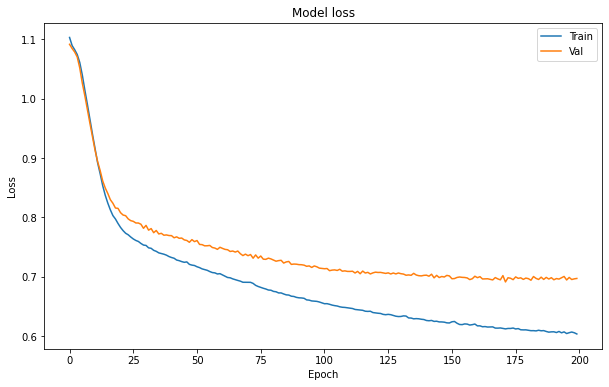

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting

plt.figure(figsize=(10,6))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

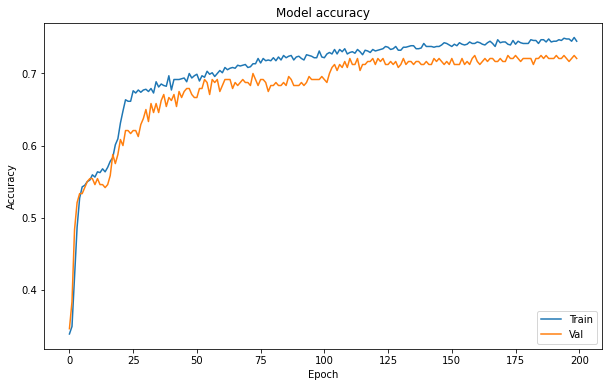

In [ ]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting

plt.figure(figsize=(10,6))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

10/10 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7367


0.7366666793823242

In [ ]:
y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_preds

10/10 [==============================] - 0s 1ms/step


array([2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2,
       2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1])

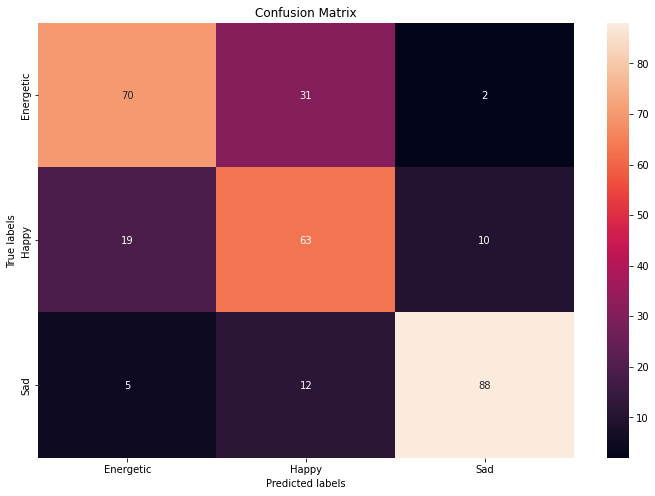

Accuracy Score 0.7366666666666667


In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

cm = confusion_matrix(y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(y_test,y_preds))

In [ ]:
def predict_mood(model, id_song, spotify):

    #Obtain the features of the song
    preds = get_track_features([id_song], spotify)

    #Pre-process the features to input the Model
    preds_features = scaler.transform(preds[col_features])

    #Predict the features of the song
    results = model.predict(preds_features)

    predicted = np.argmax(results, axis=1)[0]

    mood = target.iat[predicted, 0]

    name_song = preds.iat[0, 0]
    artist = preds.iat[0, 2]

    return print("{0} by {1} is a {2} song".format(name_song,artist, mood.upper()))

In [ ]:
predict_mood(model, "spotify:track:1ECCweJjijYRsm6wsNZKbl", spotify)

1/1 [==============================] - 0s 26ms/step
Llore y Te Supere by Elias Ayaviri is a SAD song


---

### Methods

#### Recording audio

In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");
my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            

  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);

  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };
recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}
// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}
var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())
});
}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))

  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )

  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

#### Saving audio

In [ ]:
!pip install pydub
import pydub 
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

#### Shazam

In [ ]:
!pip install shazamio
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 35.1 MB/s eta 0:00:00
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1

In [ ]:
import nest_asyncio
nest_asyncio.apply()
# Pretty Print a Dictionary using json
import json

import asyncio
from shazamio import Shazam, Serialize

In [ ]:
async def main():
  shazam = Shazam()
  out = await shazam.recognize_song('audio.mp3')

  #data = json.dumps(out, indent=4)

  return out

### Main

In [ ]:
# Grabando audio
audio, sr = get_audio()

# Guardando grabación
write('audio.mp3', sr, audio)

In [ ]:
# Step 01. Shazam (Identificando la canción)

loop = asyncio.get_event_loop()
data = loop.run_until_complete(main())

# Step 02. Obteniendo la key word para obtener la uri de la canción

search_track = data["track"]["hub"]["providers"][0]["actions"][0]["uri"]
#print(search_track)
search_track = search_track[15:].replace("%20", " ")
search_track

# Step 03. Obteniendo la uri del canción

searched_track = spotify.search(search_track, limit=1)
uri_searched_track = searched_track["tracks"]["items"][0]["uri"]
uri_searched_track

# Step 04. Obteniendo la uri del canción

searched_track = spotify.search(search_track, limit=1)
uri_searched_track = searched_track["tracks"]["items"][0]["uri"]
uri_searched_track

# Step 05. Predicción del estado de animo de la canción

predict_mood(model, uri_searched_track, spotify)

1/1 [==============================] - 0s 14ms/step
Sunny by Boney M. is a ENERGETIC song


#### Auxiliar

In [ ]:
# Shazam (Identificando la canción)

loop = asyncio.get_event_loop()
data = loop.run_until_complete(main())

In [ ]:
# Obteniendo la key word para obtener la uri de la canción

search_track = data["track"]["hub"]["providers"][0]["actions"][0]["uri"]
#print(search_track)
search_track = search_track[15:].replace("%20", " ")
search_track

'El Rap De Fernanfloo Club De Fans De Fernan'

In [ ]:
# Obteniendo la uri del canción

searched_track = spotify.search(search_track, limit=1)
uri_searched_track = searched_track["tracks"]["items"][0]["uri"]
uri_searched_track

'spotify:track:3cetIkeT9enVzoivrbB9oM'

In [ ]:
predict_mood(model, uri_searched_track, spotify)

1/1 [==============================] - 0s 94ms/step
El Rap De Fernanfloo by Club De Fans De Fernan is a HAPPY song
